In [1]:
import cv2
import os
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display
import plotly.graph_objects as go
import numpy as np


In [3]:
index = ["number_of_matches", "noise_std"]
df = pd.read_csv("results.csv", index_col = index)

In [4]:
df

Basic Stitching  Simple Graph Stitching  \
number_of_matches noise_std                                            
1                 0.00              2.897775            4.025170e-16   
                  0.04              2.839618            9.681395e-01   
                  0.08              2.960060            2.172362e+00   
                  0.12              2.682019            3.866670e+00   
                  0.16              3.167270            6.933311e+00   
                  0.20              3.675739            1.220441e+02   
                  0.24              4.011198            2.833376e+00   
5                 0.00              2.897775            4.025170e-16   
                  0.04              2.798592            6.412049e-01   
                  0.08              3.136490            3.869145e-01   
                  0.12              3.098488            4.211655e+00   
                  0.16              3.389239            1.807240e+00   
                  0.20              3.077196            3.631938e+00   
                  0.24              3.274900            3.914421e+01   
10                0.00              2.897775            4.025170e-16   
                  0.04              2.813509            3.901479e-01   
                  0.08              2.981047            3.977906e+00   
                  0.12              2.978010            8.142663e+00   
                  0.16              3.027260            5.152711e+00   
                  0.20              3.855605            8.618677e+00   
                  0.24              3.813125            1.150644e+00   
15                0.00              2.897775            4.025170e-16   
                  0.04              2.884802            5.796154e-01   
                  0.08              2.933673            9.907342e-01   
                  0.12              2.958957            7.633926e-01   
                  0.16              2.852883            3.564836e+00   
                  0.20              3.297558            1.273477e+01   
                  0.24              4.409866            2.962301e+00   
20                0.00              2.897775            4.025170e-16   
                  0.04              2.980195            1.025142e+01   
                  0.08              2.985388            8.525309e-01   
                  0.12              3.085622            2.523174e+00   
                  0.16              2.460405            2.283734e+00   
                  0.20              4.086070            8.406353e-01   
                  0.24              3.106441            4.013760e+00   
25                0.00              2.897775            4.025170e-16   
                  0.04              2.895615            8.212692e-01   
                  0.08              2.877081            5.931968e-01   
                  0.12              2.961480            8.870364e-01   
                  0.16              3.424477            1.033486e+00   
                  0.20              3.057862            5.273986e+00   
                  0.24              3.112373            1.838385e+03   
30                0.00              2.897775            4.025170e-16   
                  0.04              2.873138            1.035864e+00   
                  0.08              2.761667            8.644695e+00   
                  0.12              3.409413            3.223991e+00   
                  0.16              3.144719            3.134986e+00   
                  0.20              2.798895            3.030743e+01   
                  0.24              3.323781            1.841197e+00   

                             Edge Averaging Stitching  Multi-Graph Stitching  \
number_of_matches noise_std                                                    
1                 0.00                   4.025170e-16           4.113208e-14   
                  0.04                   9.681395e-01           9.681395e-01   
                  0.08              

In [5]:
df_v = df.drop(columns="Experiments")

In [6]:
df_v

Basic Stitching  Simple Graph Stitching  \
number_of_matches noise_std                                            
1                 0.00              2.897775            4.025170e-16   
                  0.04              2.839618            9.681395e-01   
                  0.08              2.960060            2.172362e+00   
                  0.12              2.682019            3.866670e+00   
                  0.16              3.167270            6.933311e+00   
                  0.20              3.675739            1.220441e+02   
                  0.24              4.011198            2.833376e+00   
5                 0.00              2.897775            4.025170e-16   
                  0.04              2.798592            6.412049e-01   
                  0.08              3.136490            3.869145e-01   
                  0.12              3.098488            4.211655e+00   
                  0.16              3.389239            1.807240e+00   
                  0.20              3.077196            3.631938e+00   
                  0.24              3.274900            3.914421e+01   
10                0.00              2.897775            4.025170e-16   
                  0.04              2.813509            3.901479e-01   
                  0.08              2.981047            3.977906e+00   
                  0.12              2.978010            8.142663e+00   
                  0.16              3.027260            5.152711e+00   
                  0.20              3.855605            8.618677e+00   
                  0.24              3.813125            1.150644e+00   
15                0.00              2.897775            4.025170e-16   
                  0.04              2.884802            5.796154e-01   
                  0.08              2.933673            9.907342e-01   
                  0.12              2.958957            7.633926e-01   
                  0.16              2.852883            3.564836e+00   
                  0.20              3.297558            1.273477e+01   
                  0.24              4.409866            2.962301e+00   
20                0.00              2.897775            4.025170e-16   
                  0.04              2.980195            1.025142e+01   
                  0.08              2.985388            8.525309e-01   
                  0.12              3.085622            2.523174e+00   
                  0.16              2.460405            2.283734e+00   
                  0.20              4.086070            8.406353e-01   
                  0.24              3.106441            4.013760e+00   
25                0.00              2.897775            4.025170e-16   
                  0.04              2.895615            8.212692e-01   
                  0.08              2.877081            5.931968e-01   
                  0.12              2.961480            8.870364e-01   
                  0.16              3.424477            1.033486e+00   
                  0.20              3.057862            5.273986e+00   
                  0.24              3.112373            1.838385e+03   
30                0.00              2.897775            4.025170e-16   
                  0.04              2.873138            1.035864e+00   
                  0.08              2.761667            8.644695e+00   
                  0.12              3.409413            3.223991e+00   
                  0.16              3.144719            3.134986e+00   
                  0.20              2.798895            3.030743e+01   
                  0.24              3.323781            1.841197e+00   

                             Edge Averaging Stitching  Multi-Graph Stitching  \
number_of_matches noise_std                                                    
1                 0.00                   4.025170e-16           4.113208e-14   
                  0.04                   9.681395e-01           9.681395e-01   
                  0.08              

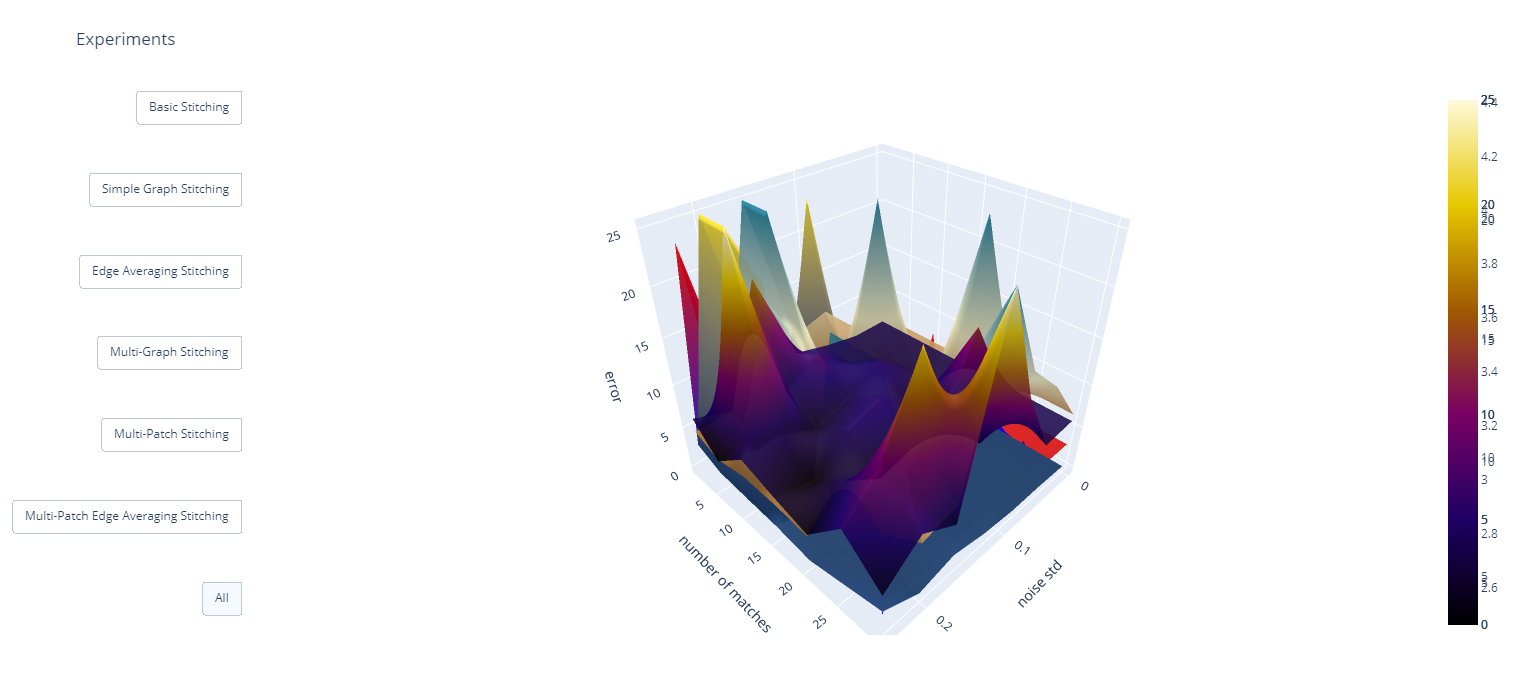

In [50]:

x = np.unique([ v[1] for v in df_v.index.values])
y = np.unique([ v[0] for v in df_v.index.values])
color_scales = ["Blackbody","Bluered","Blues","Cividis","Earth","Electric","Greens","Greys","Hot","Jet","Picnic","Portland","Rainbow","RdBu","Reds","Viridis","YlGnBu","YlOrRd"]

fig = go.Figure()
for i,c in enumerate(df_v.columns):
    z=np.minimum(df_v.loc[:,c].values.reshape((x.shape[0],y.shape[0])), 25)
    #z=np.minimum(df_v.loc[:,c].values, 25)
    fig.add_trace(go.Surface(name = c, 
                             visible = True,
                             x=x,
                             y=y,
                             z=z, 
                             colorscale = color_scales[i] , 
                             showscale=True, 
                             opacity=0.9))

um = [ {} for _ in range(len(df_v.columns)) ]
menuadjustment = 0.15

buttonX = -0.1
buttonY = 1 + menuadjustment
for i, col in enumerate(df_v.columns):
    button = dict(method='restyle',
                  label=col,
                  visible=True,
                  args = [{'visible':True}, [i]],
                  args2 = [{'visible': False}, [i]],
                 )
    
    # adjust some button features
    buttonY = buttonY-menuadjustment
    um[i]['buttons'] = [button]
    um[i]['showactive'] = False
    um[i]['y'] = buttonY
    um[i]['x'] = buttonX

# add a button to toggle all traces on and off
button2 = dict(method='restyle',
               label='All',
               visible=True,
               args=[{'visible':True}],
               args2 = [{'visible': False}],
               )

# assign button2 to an updatemenu and make some adjustments
um.append(dict())
um[i+1]['buttons'] = [button2]
um[i+1]['showactive'] = True
um[i+1]['y'] = buttonY - menuadjustment
um[i+1]['x'] = buttonX

scene = dict(
            xaxis = dict(
                title='noise std'),
            yaxis = dict(
                title='number of matches'),
            zaxis = dict(
                title='error'),
            )

fig.update_layout(title='Experiments',
                  scene = scene,
                  autosize=True,
                  width=1000,
                  height=700,
                  showlegend=True, 
                  updatemenus=um,
                  margin=dict(l=65, r=50, b=65, t=90))

for m in fig.layout.updatemenus:
    m['type'] = 'buttons'

fig.show()